# Business Application Development 
## Assignment 9: Statistical Modeling

Please complete these exercises to the best of your abilities. Please include code to invoke each of your programs to demonstrate the functionality. Write comments throughout your code to explain steps. If you run into a persistent error, please demonstrate your efforts to resolve it; search the web for the error, see if you can get closer to figuring it out. Document what you tried in order to fix the problem.

### Wine quality data analysis
The exercises in this assignment are based on a data set that contains several characteristics of red wine along with a measure of wine quality as rated by expert wine tasters. Our objective in this analysis is to understand the relationship between the collection of variables describing the wine and the quality rating. We will take some time to understand the output and evaluate the model. We will come back to this data set in the next unit to attempt to improve the predictive power of the model. The wine quality data set can be found in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which holds a large collection of data sets useful for practicing techniques in the domains of statistical modeling and machine learning. 

In [1]:
# suppress warning messages to improve output readability
import warnings
warnings.filterwarnings("ignore")


### Problem 1 - Pre-processing
The [red wine quality data set](https://archive.ics.uci.edu/ml/datasets/wine+quality) contains measures of various characterstics presumed to be related to wine quality. The function below should read the data from the url and perform several pre-processing steps. 

a. Determine the variable names.   
b. Find the dimensions of the data frame.   
c. Check all of the data types.   
d. Check for missing (null) values. 

In [3]:
def preprocessing(url):
    import pandas as pd

    wine=pd.read_csv(url,header=None)

    #read in the data using the pandas read_csv() function
    wine = pd.read_csv(url,header=0,sep=';')

    # rename the variables
    wine=wine.rename(columns={'fixed acidity':'fixed_acidity', 
                     'volatile acidity':'volatile_acidity',
                     'citric acid': 'citric_acid', 
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'  
                     })

    print(wine.head(),'\n')

    # a. Determine the variable names
    k= wine.keys()
    print('THE VARIABLES ARE:','\n', k, '\n')

    # b. Find the number of rows and columns
    dim= wine.shape
    print('THE DIMENSIONS OF THE DATA FRAME ARE (rows,columns):', dim, '\n')

    # c. Check all of the data types
    dt= wine.dtypes
    print('CHECKING THE DATA TYPES:','\n',dt,'\n')

    # d. See if there are any missing values in the data
    nulls= wine.isnull().sum()
    print('CHECKING FOR NULL VALUES:','\n',nulls)

Test the function on the code block below

In [4]:
u='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
preprocessing(u)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Expected Output
```
fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns] 

THE VARIABLES ARE: 
 Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object') 

THE DIMENSIONS OF THE DATA FRAME ARE (rows,columns): (1599, 12) 

CHECKING THE DATA TYPES: 
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

CHECKING FOR NULL VALUES: 
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
```

### Problem 2 - Data Summaries and Exploration
In this problem, we calculate the summary statistics for each of the variables in the data set. When we have multiple explanatory variables, it can be useful to examine the pairwise correlations. If predictor variables are related to one another, statisticians take the step of removing one of the variables from the model (checking for multicollinearity). It is important to make sure the model inputs all contribute unique information. 

a. Generate the statistical summary.    
b. Calculate and plot the pairwise correlations. 

In [5]:
def exploring_data(url):
    import pandas as pd
    import seaborn as sns
    import numpy as np

    wine=pd.read_csv(url,header=None)

    #read in the data using the pandas read_csv() function
    wine = pd.read_csv(url,header=0,sep=';')

    # rename the variables
    wine=wine.rename(columns={'fixed acidity':'fixed_acidity', 
                     'volatile acidity':'volatile_acidity',
                     'citric acid': 'citric_acid', 
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'  
                     })
    
    # a. find statistical summmary of the data
    w_stat= wine.describe()
    print("STATISTICAL SUMMARY OF WINE DATA:", '\n', w_stat.round(decimals=2))

    # b.i. calculate the pairwise correlations
    corr= wine.corr()
    print("PAIRWISE CORRELATIONS:",'\n', corr.round(decimals=2))

    # b.ii. create a heatmap of the correlations
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask)


STATISTICAL SUMMARY OF WINE DATA: 
        fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   


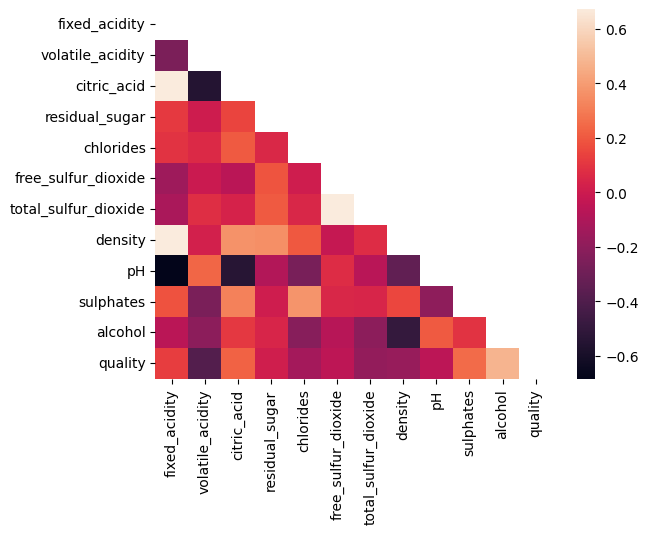

In [6]:
u='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
exploring_data(u)

Expected Output
```
STATISTICAL SUMMARY OF WINE DATA: 
        fixed_acidity  volatile_acidity  ...  alcohol  quality
count        1599.00           1599.00  ...  1599.00  1599.00
mean            8.32              0.53  ...    10.42     5.64
std             1.74              0.18  ...     1.07     0.81
min             4.60              0.12  ...     8.40     3.00
25%             7.10              0.39  ...     9.50     5.00
50%             7.90              0.52  ...    10.20     6.00
75%             9.20              0.64  ...    11.10     6.00
max            15.90              1.58  ...    14.90     8.00

[8 rows x 12 columns]
PAIRWISE CORRELATIONS: 
                       fixed_acidity  volatile_acidity  ...  alcohol  quality
fixed_acidity                  1.00             -0.26  ...    -0.06     0.12
volatile_acidity              -0.26              1.00  ...    -0.20    -0.39
citric_acid                    0.67             -0.55  ...     0.11     0.23
residual_sugar                 0.11              0.00  ...     0.04     0.01
chlorides                      0.09              0.06  ...    -0.22    -0.13
free_sulfur_dioxide           -0.15             -0.01  ...    -0.07    -0.05
total_sulfur_dioxide          -0.11              0.08  ...    -0.21    -0.19
density                        0.67              0.02  ...    -0.50    -0.17
pH                            -0.68              0.23  ...     0.21    -0.06
sulphates                      0.18             -0.26  ...     0.09     0.25
alcohol                       -0.06             -0.20  ...     1.00     0.48
quality                        0.12             -0.39  ...     0.48     1.00
[12 rows x 12 columns]
```
![image](https://drive.google.com/uc?id=1OKktT8hMA9fGDm-3K3zeif2Gm2GyFH64)

## Problem 3 - Linear Regression: Full Model
Perform the linear regression analysis all of the explanatory variables in order to predict the response variable (wine quality rating). Examine the output. The regression formula is built for you, your task is to complete the missing code to build the model using ordinary least squares and then type the correct command to show the regression results.  

In [8]:
def multiple_regression_all(url):
    import pandas as pd
    wine=pd.read_csv(url,header=None)

    #read in the data using the pandas read_csv() function
    wine = pd.read_csv(url,header=0,sep=';')

    # rename the variables
    wine=wine.rename(columns={'fixed acidity':'fixed_acidity', 
                     'volatile acidity':'volatile_acidity',
                     'citric acid': 'citric_acid', 
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'  
                     })
    
    # build the portion of the regression formula containing only the predictor variables
    X=list(wine.columns)
    X.remove('quality')
    predictors='+'.join(X)
    print('PREDICTOR VARIBLES:', predictors,'\n')

    # Regression analysis
    # import statsmodels.api as sm <-- tool appears to be depricated
    import pandas.util.testing as tm
    import statsmodels.formula.api as smf

    # Build the formula using the following
    f = "quality~" + predictors
    print('REGRESSION FORMULA:',f,'\n')

    # use the correct statsmodels function to generate the linear model (ordinary least squares regression)
    lm=smf.ols(formula=f, data= wine).fit()

    # inspect a summary of the results of the linear regression
    print(lm.summary())



In [9]:
u='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
multiple_regression_all(u)

PREDICTOR VARIBLES: fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol 

REGRESSION FORMULA: quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.79e-145
Time:                        18:37:48   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11   

Expected Output
```
PREDICTOR VARIBLES: fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol 

REGRESSION FORMULA: quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol 

                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          1.79e-145
Time:                        13:55:55   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
```

## Problem 4 - Linear Regression: Reduced Model
Through our exploratory analysis and from the results of the regression using the full model, there are some indications that one or more of the predictor variables are related to eachother, meaning we are not inputting unique information into the model (multicollinearity). We may be able to build a model that is just as good (similar R-squared) by using only a subset of the variables. 

a. Run the regression analysis using only alcohol content and fixed acidity as the predictors of wine quality. 

b. Fill in the blanks in the text to interpret the output. 

#### a. Fit the reduced linear regression model by completing the code below. 

In [10]:
def multiple_regression_reduced(url):
    import pandas as pd
    import seaborn as sns
    import numpy as np

    wine=pd.read_csv(url,header=None)

    #read in the data using the pandas read_csv() function
    wine = pd.read_csv(url,header=0,sep=';')

    # rename the variables
    wine=wine.rename(columns={'fixed acidity':'fixed_acidity', 
                     'volatile acidity':'volatile_acidity',
                     'citric acid': 'citric_acid', 
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'  
                     })
    
    # Regression analysis
    import pandas.util.testing as tm
    import statsmodels.formula.api as smf

    # specify the regression formula 
    f2 = "quality~" + "alcohol+volatile_acidity"
    print('REGRESSION FORMULA:',f2,'\n')

    # use the correct statsmodels function to generate the linear model (ordinary least squares regression)
    lm= smf.ols(formula=f2,data=wine).fit()

    # inspect a summary of the results of the linear regression
    print(lm.summary())

In [11]:
u='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
multiple_regression_reduced(u)

REGRESSION FORMULA: quality~alcohol+volatile_acidity 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     370.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          7.35e-133
Time:                        18:39:38   Log-Likelihood:                -1621.8
No. Observations:                1599   AIC:                             3250.
Df Residuals:                    1596   BIC:                             3266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Expected Output
```|
REGRESSION FORMULA: quality~alcohol+volatile_acidity 

                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     370.4
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          7.35e-133
Time:                        14:01:18   Log-Likelihood:                -1621.8
No. Observations:                1599   AIC:                             3250.
Df Residuals:                    1596   BIC:                             3266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0955      0.184     16.778      0.000       2.734       3.457
alcohol              0.3138      0.016     19.604      0.000       0.282       0.345
volatile_acidity    -1.3836      0.095    -14.524      0.000      -1.570      -1.197
==============================================================================
Omnibus:                       17.005   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.998
Skew:                          -0.064   Prob(JB):                     2.26e-06
Kurtosis:                       3.611   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

#### b. Interpret Regression Output
(double-click the text to begin editing)

- Coefficients

**Alcohol Content**  
For each unit increase in the alcohol content, the model predicts an increase of 0.314 in the wine quality (statistically significant, p-value=0.00).

**Volatile Acidity**  
For each unit increase in the volatile acidity, the model predicts a 1.387 decrease in the wine quality rating. (statistically significant, p-value=0.00)

- Intercept: 

When all explanatory variables are equal to 0, the model predicts a wine quality rating of _____.  (not meaningful in the context of this scenario)


- Adj R-squared: 

About _____ of the variation in the wine quality ratings is explained by the linear regression model.  


- P-value for the Model: 

The overall statistical significance of the linear model is measured by the f-test for regression.  A small p-value means that the model developed from this data is unlikely to be observed by chance, therefore it is more plausible to attribute the observed relationship between variables to an actual phenomenon.  The p-value associated with the f-statistic in this case is _____.  Because this is extremely small, we conclude that there is an actual relationship between the collection of explanatory variables and the wine quality rating.  


